In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = {
        "axes.titlesize" : 18 
    }
)

sns.set_style('darkgrid')

# константа для задания размеров графиков
FIGSIZE_TUPLE = (12, 9)

In [3]:
train = pd.read_csv('desktop/data/mlbootcamp5_train.csv', sep=';')

In [4]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


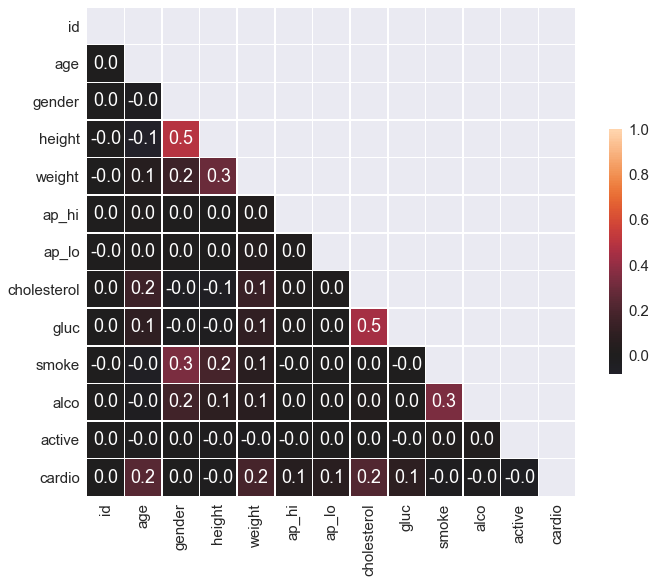

In [6]:
# Вычисляем матрицу корреляций
corr = train.corr(method='pearson')

# Генерируем маску для отсечения верхней диагонали матрицы
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=FIGSIZE_TUPLE)

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

1: Weight, Gender

# Задание 2

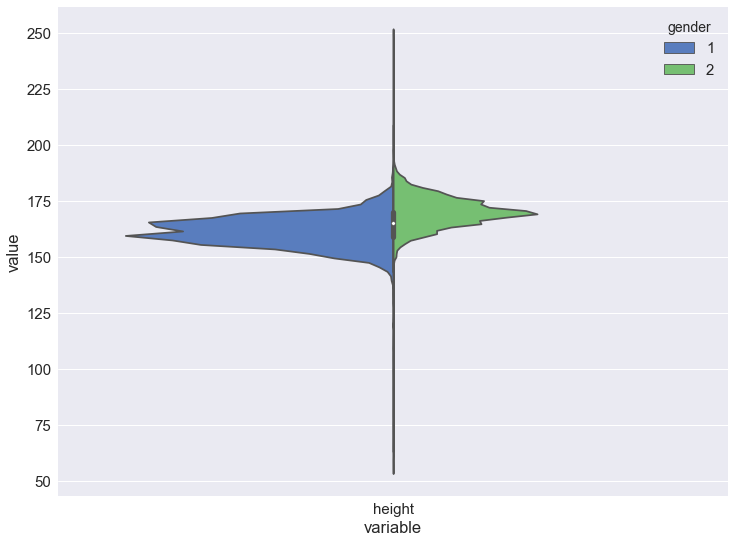

In [7]:
train_melt = pd.melt(frame=train, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=FIGSIZE_TUPLE)
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=train_melt, 
    scale='count',
    scale_hue=False
)

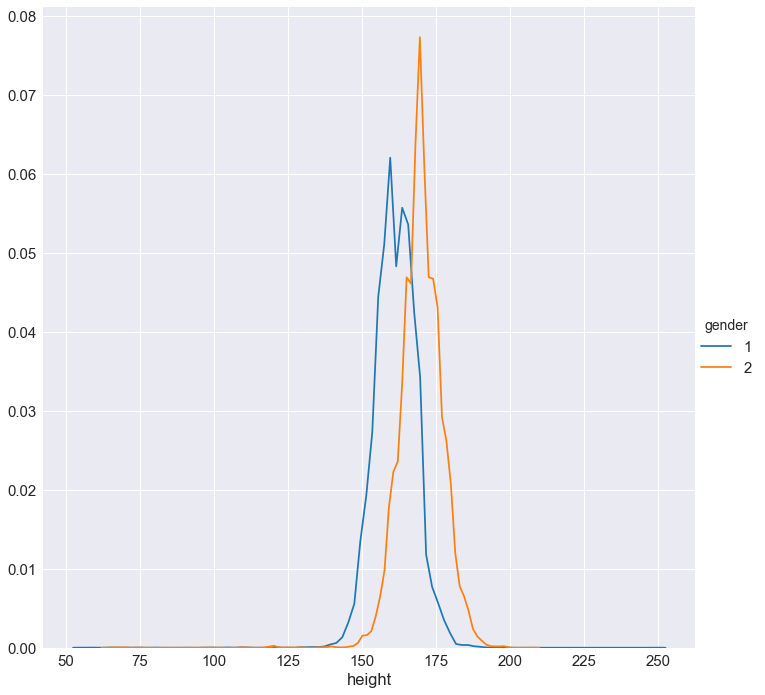

In [8]:
(
    sns.FacetGrid(train, hue="gender", size=10)
        .map(sns.kdeplot, "height")
        .add_legend()
);

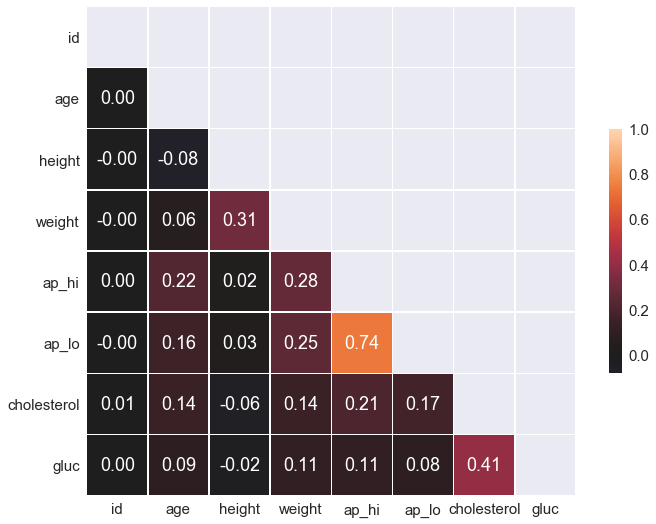

In [10]:
corr = train[
    [
        'id', 'age', 'height', 'weight', 
        'ap_hi', 'ap_lo', 'cholesterol', 
        'gluc'
    ]
].corr(method='spearman')

# Маска для закрытия верхнего треугольника матрицы корреляций
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=FIGSIZE_TUPLE)

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

3.1: Ap_hi, Ap_lo
3.2: Природа данных

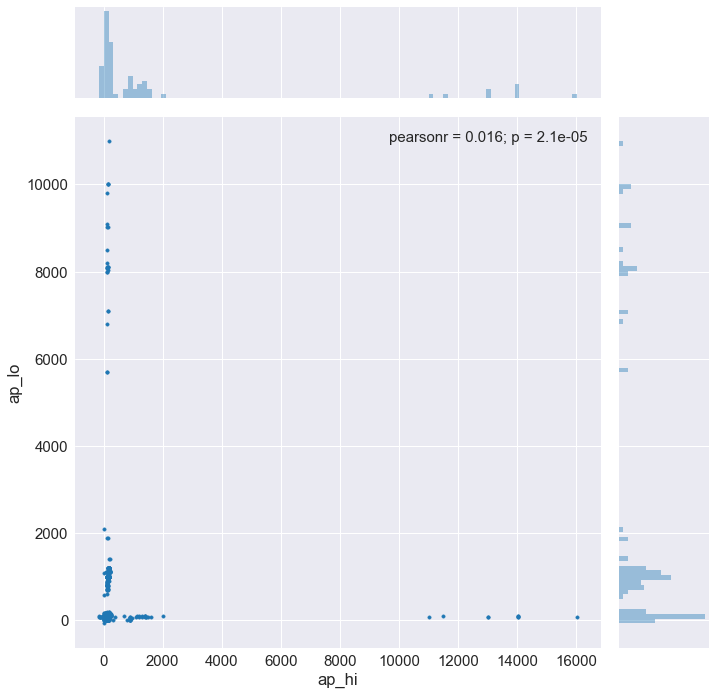

In [11]:
sns.jointplot(
    train['ap_hi'], 
    train['ap_lo'], 
    size=10, 
    marker='.',
    marginal_kws=dict(bins=100, rug=False, hist_kws={'log': True}),  # Параметры гистограммы
);

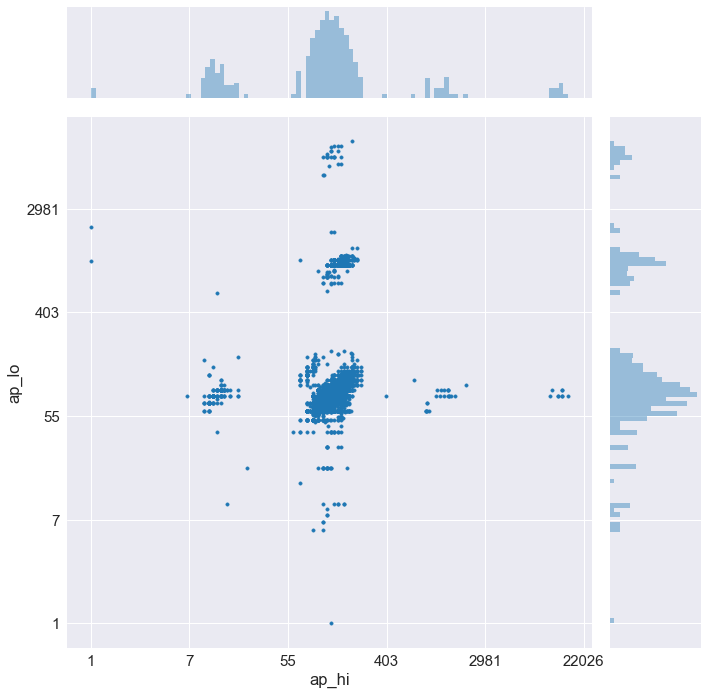

In [13]:
tmp_train = train[(train['ap_hi'] > 0) & (train['ap_lo'] > 0)][['ap_lo', 'ap_hi']].apply(np.log)
g = sns.jointplot(
    tmp_train['ap_hi'], 
    tmp_train['ap_lo'],
    size=10, 
    stat_func=None,  # Не выводим корреляцию
    marginal_kws=dict(bins=100, rug=False, hist_kws={'log': True}),  # Параметры гистограммы
    marker='.'
)

# Преобразуем логарифмические значения на шкалах в реальные
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(round(np.exp(x)))))
)
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(
    lambda x, pos: str(int(round(np.exp(x)))))
)

4: больше трех

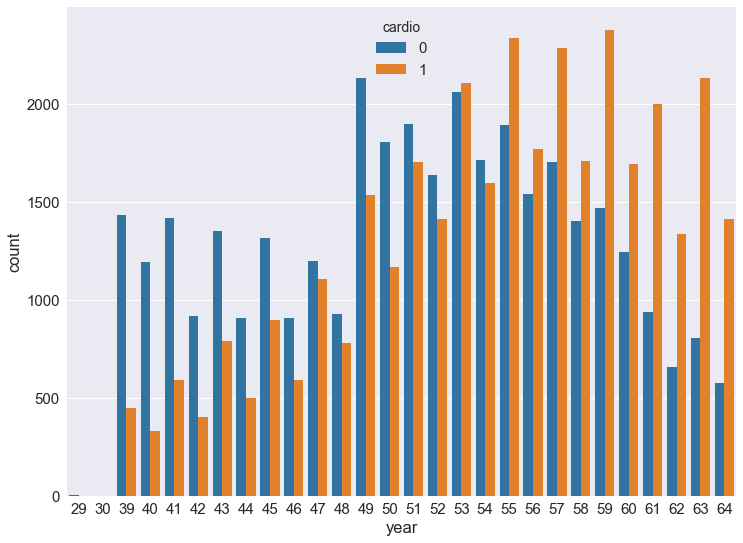

In [15]:
train['year'] = (train['age'] // 365.25).astype(int)
plt.figure(figsize=FIGSIZE_TUPLE)
sns.countplot(x="year", hue='cardio', data=train);

5. 53